In [29]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random as rnd
from collections import Counter

In [41]:
G = nx.erdos_renyi_graph(1000,0.008) #(ilosc wezlow, prawdopodobienstwo)
color_map = []
#print(G.nodes[8]["Value"])
#if():
#print('Nodes:')
#print(G.nodes())
jeden=0
zero=0
#print('Neigborhood:')
for i in G.nodes:
    neighbors=list(G.neighbors(i))
    #print(f'{i} - {neighbors}')

#print('Values:')
for i in G.nodes:
    value=rnd.randrange(0, 2, 1)
    nx.set_node_attributes(G, {i: value}, name="Value")
    d=G.nodes[i]["Value"]
    if(d==1):
        color_map.append('green') 
        jeden=jeden+1
    else:
        color_map.append('red')
        zero=zero+1 
    #print(f'{i} - {d}')
print(jeden,zero)
#nx.draw(G, node_color=color_map)

511 489


In [ ]:
# łańcuch
G = nx.Graph()
jeden=0
zero=0
z_one=[]
delta=5

# dodaje 1000 wezlow
G.add_nodes_from(range(1000))

for i in G.nodes:
    value=rnd.randrange(0, 2, 1)
    nx.set_node_attributes(G, {i: value}, name="Value")
    d=G.nodes[i]["Value"]
    if(d==1):
        color_map.append('green') 
        jeden=jeden+1
    else:
        color_map.append('red')
        zero=zero+1 

print(jeden,zero)


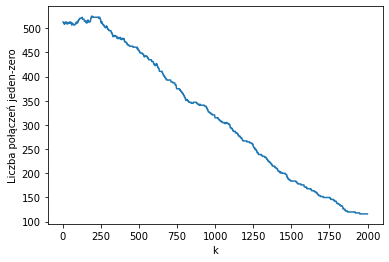

In [48]:
#wiekszosciowy
delta=5
color_map1=[]
zero_one= []

for k in range(2000):
    
    randomy=delta*[None]
    for i in range(delta):
        randomy[i]=rnd.randrange(0,1000,1)
    for i in randomy:
        V=0
        N=0
        d=G.nodes[i]["Value"]
        if len(list(G.neighbors(i)))>1:
            for neighbor in G.neighbors(i):
                while(N<3):
                    V += G.nodes[neighbor]["Value"]
                    N += 1
            #   print(V)
            V /= 3
        if(V>=0.5):
            nx.set_node_attributes(G, {i: 1}, name="Value2")
            nx.set_node_attributes(G, {i: 1}, name="Value")
        else:
            nx.set_node_attributes(G, {i: 0}, name="Value2")
            nx.set_node_attributes(G, {i: 0}, name="Value")
        dd=G.nodes[i]["Value2"]
        if(jeden>90 or zero>90):
            break
        elif(dd != d and dd==0):
            jeden=jeden-1
            zero=zero+1
        elif (dd != d and dd==1):
           jeden=jeden+1
           zero=zero-1
    count = 0
    for i in range(999):
        if (G.nodes[i]["Value"] != G.nodes[i+1]["Value"]):
            count += 1
           
  #  print(zero_one)

    zero_one.append(count)
  #  print(jeden,zero)
    delta+=5
for r in range(jeden):
    color_map1.append('green')
for k in range(zero):
    color_map1.append('red')
#nx.draw(G,node_color=color_map1)


# wykres
plt.plot(range(2000), zero_one)
plt.xlabel("k")
plt.ylabel("Liczba połączeń jeden-zero")
plt.show()

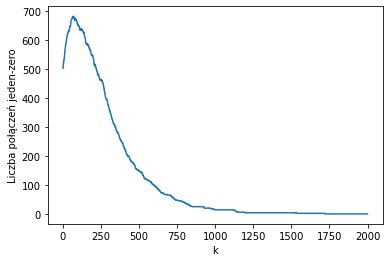

In [46]:
#głosującego

delta=5
randomy=delta*[None]
color_map2=[]
V_neighbors=[None]
zero_one_1=[]
for k in range(2000):
    for i in range(len(randomy)):
        randomy[i]=rnd.randrange(0,1000,1)
    for i in randomy:
        Val=G.nodes[i]["Value"]
        for neighbor in G.neighbors(i):
            V_neighbors.append(G.nodes[neighbor]["Value"])
        Val2=rnd.choice(V_neighbors)
        nx.set_node_attributes(G, {i: Val2}, name="Value2")
        nx.set_node_attributes(G, {i: Val2}, name="Value")
        if(Val2 != Val and Val2==1):
            jeden=jeden+1
            zero=zero-1
        elif(Val2 != Val and Val2==0):
            jeden=jeden-1
            zero=zero+1
        elif (jeden>990 or zero>990):
            break
      #  print(jeden,zero)

    count = 0
    for i in range(999):
        if (G.nodes[i]["Value"] != G.nodes[i+1]["Value"]):
            count += 1      
   # print(zero_one)
    zero_one_1.append(count)
        
for r in range(jeden):
 
    color_map2.append('green')
for k in range(zero):
    color_map2.append('red')
#nx.draw(G,node_color=color_map2)


# wykres
plt.plot(range(2000), zero_one_1)
plt.xlabel("k")
plt.ylabel("Liczba połączeń jeden-zero")
plt.show()
    

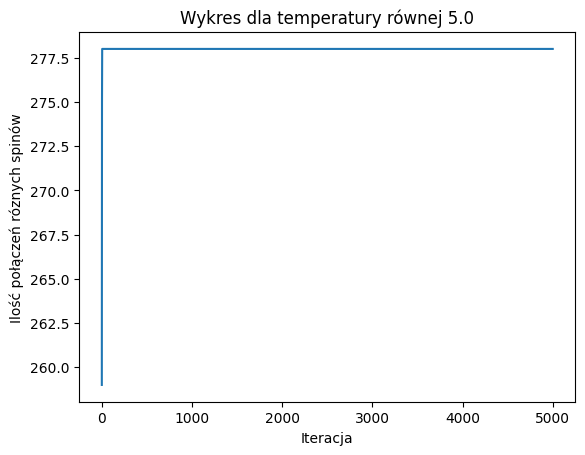

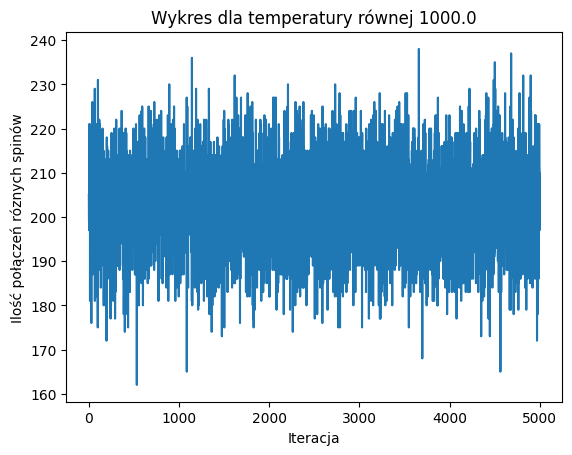

In [14]:
G = nx.erdos_renyi_graph(99,0.08) #(ilosc wezlow, prawdopodobienstwo)
jeden=0
zero=0
for i in G.nodes:
    neighbors=list(G.neighbors(i))
for i in G.nodes:
    value=rnd.choice([1, -1])
    nx.set_node_attributes(G, {i: value}, name="Value")
    d=G.nodes[i]["Value"]
    if(d==1):
        color_map.append('green') 
        jeden=jeden+1
    else:
        color_map.append('red')
        zero=zero+1 
# ising
def energy(spin, a):
    return -spin * a
RANGE=5000
temp=np.linspace(5,1000,2)#temperatura
k=1 # stała boltzmana
for T in temp:
    beta=1/(k*T)
    p=[]
    for i in range(-100,100,1):
        p.append(np.exp(-beta*energy(1,i))/(np.exp(-beta*energy(-1,i))+np.exp(-beta*energy(1,i))))
    max_value=[]
    for j in range(RANGE):    
        P=0
        for i in G.nodes():
            spin=G.nodes[i]["Value"]
            sum=0
            for neighbor in G.neighbors(i):
                sum+=G.nodes[neighbor]["Value"]
            if np.random.random() < p[sum]:
                G.nodes[i]["Value"] = 1
                P=P+1  
            else:
                G.nodes[i]["Value"] = -1
        num_connections = 0 
        for edge in G.edges():  #liczba połaczeń -1 i 1 
            if G.nodes[edge[0]]['Value'] != G.nodes[edge[1]]['Value']:
                num_connections += 1
        max_value.append(num_connections)
    plt.plot(list(range(1, RANGE +1, 1)),max_value)
    plt.title(f'Wykres dla temperatury równej {round(T,2)}')
    plt.xlabel("Iteracja")
    plt.ylabel("Ilość połączeń róznych spinów")
    plt.show()
